In [1]:
import pandas as pd
import numpy as np
import pickle

from shapely.geometry import Point, MultiPolygon, MultiPoint
import shapely.wkt

import astropy.units as u

## Importing Fiber Positions

In [2]:
folder = 'C:/Users/oryan/Documents/weave-proj'
data_folder = f'{folder}/catalogue'
fov_folder = f'{folder}/instrument-fovs'

In [3]:
pos_df = pd.read_table(f'{data_folder}/LIFUfibreTableEdit.dat', delim_whitespace=True, header=None,
                       engine='python', skiprows=3, names=['x','y','ifu_spaxel', 'ifu_slits', 'fibreid'])

In [4]:
pos_df.head()

,x,y,ifu_spaxel,ifu_slits,fibreid
0,17.14,0.0,C01,2-11,31
1,17.36,0.0,C02,3-12,53
2,17.58,0.0,C03,4-12,74
3,17.80,0.0,C04,5-10,93
4,18.02,0.0,C05,6-13,117


### Building the Polygon

In [5]:
points = []
for i in range(len(pos_df)):
    x = pos_df.x.iloc[i]
    y = pos_df.y.iloc[i]
    points.append((x, y))

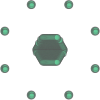

In [6]:
MultiPoint(points)

### Building Polygon in Arcseconds

In [7]:
sdss_pixel_size_scale = (0.396 * u.arcsec / (24 * u.micrometer)).to(u.arcsec / u.mm)

In [8]:
broken_spaxels = [
    'C07',
    '',
    '27A',
    '26F'
]

In [9]:
points_arcsec = []
for i in range(len(pos_df)):
    
    if pos_df.ifu_spaxel.iloc[i] in broken_spaxels:
        continue
    
    x = pos_df.x.iloc[i] * u.mm
    y = pos_df.y.iloc[i] * u.mm
    
    x_arc = float(x * sdss_pixel_size_scale / u.arcsec)
    y_arc = float(y * sdss_pixel_size_scale / u.arcsec)
    
    points_arcsec.append((y_arc, x_arc))

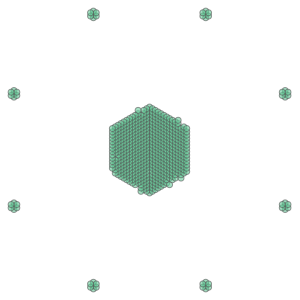

In [10]:
MultiPoint(points_arcsec)

In [11]:
sdss_pixel_size_scale

<Quantity 16.5 arcsec / mm>

In [12]:
x_arc

182.80350000000004

In [13]:
points_text = []
for i in range(len(pos_df)):
    if pos_df.ifu_spaxel.iloc[i] in broken_spaxels:
        continue
        
    x = pos_df.x.iloc[i] * u.mm
    y = pos_df.y.iloc[i] * u.mm
    
    y_deg = (x * sdss_pixel_size_scale).to(u.deg)
    x_deg = (y * sdss_pixel_size_scale).to(u.deg)
    
    pos_sky_x = (360 * u.deg + x_deg) / u.deg
    pos_sky_y = (0 * u.deg + y_deg) / u.deg
    
    points_text.append(f'point({np.round(pos_sky_x, 4)}, {np.round(pos_sky_y, 4)})')

In [14]:
points_text

['point(360.0, 0.0786)',
 'point(360.0, 0.0796)',
 'point(360.0, 0.0806)',
 'point(360.0, 0.0816)',
 'point(360.0, 0.0826)',
 'point(360.0, 0.0836)',
 'point(360.0, 0.0856)',
 'point(360.0, 0.0866)',
 'point(360.0, 0.0876)',
 'point(360.0, 0.0886)',
 'point(360.0, 0.0897)',
 'point(360.0, 0.0907)',
 'point(360.0, 0.0917)',
 'point(360.0, 0.0927)',
 'point(360.0, 0.0937)',
 'point(360.0, 0.0947)',
 'point(360.0, 0.0957)',
 'point(360.0, 0.0967)',
 'point(360.0, 0.0977)',
 'point(360.0, 0.0987)',
 'point(360.0, 0.0997)',
 'point(360.0, 0.1007)',
 'point(360.0, 0.1018)',
 'point(360.0, 0.1028)',
 'point(360.0, 0.1038)',
 'point(360.0, 0.1048)',
 'point(360.0009, 0.0791)',
 'point(359.9991, 0.0791)',
 'point(360.0009, 0.0801)',
 'point(359.9991, 0.0801)',
 'point(360.0009, 0.0811)',
 'point(359.9991, 0.0811)',
 'point(360.0009, 0.0821)',
 'point(359.9991, 0.0821)',
 'point(360.0009, 0.0831)',
 'point(359.9991, 0.0831)',
 'point(360.0009, 0.0841)',
 'point(359.9991, 0.0841)',
 'point(360.00